In [377]:
pip install fake_useragent

In [378]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

ua = UserAgent()
header = {'user-agent':ua.chrome}
google_page = requests.get('https://in.investing.com/indices/s-p-cnx-nifty-historical-data?end_date=1642789800&interval_sec=weekly&st_date=1640111400&interval_sec=daily',headers=header)
#print(google_page.content)

soup = BeautifulSoup(google_page.content,'lxml') # html.parser

#print(soup.prettify())

b'\n<!DOCTYPE html>\n<html lang="en-in" class="Other">\n<head>\n<title>Nifty 50 Historical Rates - Investing.com India</title>\n<meta name="description" content="Access free historical data for the S&P CNX Nifty." />\n<meta name="charset" content="utf-8" />\n<meta name="spaceShips" content="sdhgsg" />\n<meta http-equiv="x-ua-compatible" content="ie=edge" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />\n<meta name="twitter:card" content="summary" />\n<meta name="twitter:site" content="@investing_ind" />\n<meta name="twitter:title" content="Nifty 50 Historical Rates - Investing.com India" />\n<meta name="twitter:description" content="Access free historical data for the S&amp;P CNX Nifty." />\n<meta name="twitter:image" content="https://i-invdn-com.investing.com/redesign/images/seo/investing_300X300.png" />\n<meta property="og:title" content="Nifty 50 Historical Rates - Investing.com India" />\n<meta property="og:description" content="Access fre

In [379]:
import pandas as pd
import numpy as np

In [380]:
df = pd.DataFrame(np.arange(1000))
df['date'] = soup.find('td', class_ = 'col-rowDate').text[1:-1]
df['price'] = soup.find('td', class_ = 'col-rowDate').next_sibling.next_sibling.text[1:-1]

In [381]:
i =0
for date in soup.find_all('td', class_ = 'col-rowDate'):
  df['date'][i] = date.text[1:-1]
  i=i+1

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,date,price
0,0,"Jan 21, 2022","17,617.15"
1,1,"Jan 20, 2022","17,617.15"
2,2,"Jan 19, 2022","17,617.15"
3,3,"Jan 18, 2022","17,617.15"
4,4,"Jan 17, 2022","17,617.15"


In [382]:
 i = 0
 for price in soup.find_all('td', class_ = 'col-rowDate'):
   df['price'][i] = price.next_sibling.next_sibling.text[1:-1]
   i=i+1
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,date,price
0,0,"Jan 21, 2022","17,617.15"
1,1,"Jan 20, 2022","17,757.00"
2,2,"Jan 19, 2022","17,938.40"
3,3,"Jan 18, 2022","18,113.05"
4,4,"Jan 17, 2022","18,308.10"


In [383]:
df= df.drop(0, axis = 1)


In [384]:
df = df.drop_duplicates(['price'])

In [385]:
print(df.shape)
df.head()

for i in range(len(df)):
 df['price'][i] = float(df['price'][i].replace(',', ''))

(23, 2)


In [386]:
df = df.iloc[::-1]

In [387]:
df

,date,price
22,"Dec 22, 2021",16955.5
21,"Dec 23, 2021",17072.6
20,"Dec 24, 2021",17003.8
19,"Dec 27, 2021",17086.2
18,"Dec 28, 2021",17233.2
17,"Dec 29, 2021",17213.6
16,"Dec 30, 2021",17204
15,"Dec 31, 2021",17354
14,"Jan 03, 2022",17625.7
13,"Jan 04, 2022",17805.2


In [388]:
df.to_csv('file_name.csv')

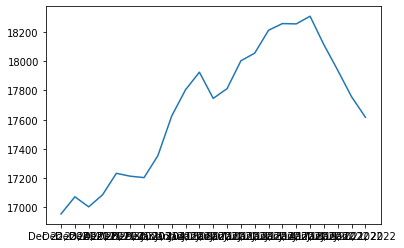

In [389]:
import matplotlib.pyplot as plt
plt.plot(df['date'],df['price'])
plt.show()



No handles with labels found to put in legend.


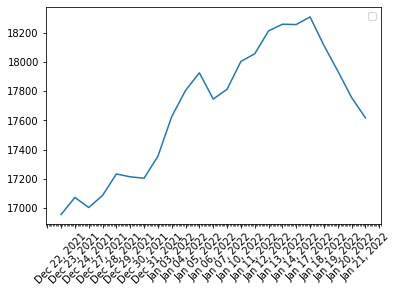

In [390]:
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.ticker import MultipleLocator

plt.plot(df['date'], df['price'])
plt.legend()
ax = plt.gca().get_xaxis()

ax.set_major_locator(MultipleLocator(1))
ax.set_minor_locator(MultipleLocator(0.1))
#ax.set_major_formatter(dates.DateFormatter('%Y-%b-%d'))

for item in ax.get_ticklabels():
    item.set_rotation(45)